
## **1D random walk with boundaries**:

### In this scenario, if a particle reaches a wall (or boundary), it can no longer proceed in the direction of the wall. Instead, it "bounces" off the wall, which means its direction is reversed. Here's how this works:

#### **Please make your own copy of this notebook before making changes or beginning the exercises!**



*   Boundaries: We define limits or walls on either side of the 1D line. For example, let's say the line is bounded between x_min = 0 and x_max = L, where L is the length of the line.
*   If the particle attempts to move left when it is at the minimum boundary (x_min), it "bounces" and is forced to move right.


*   Similarly, if the particle attempts to move right when it is at the maximum boundary (x_max), it "bounces" and is forced to move left.
*   The probability distribution of the particle's position will also change compared to the unbounded case.

*   In the long run, if the boundaries are reflective and the random walk is symmetric (equal probability of moving left or right), **the particle will spend equal amounts of time near each boundary**.










### This "bouncing" random walk is often called a **reflecting boundary random walk** and models systems where particles are constrained within a fixed range, such as *diffusion inside a container*.

Let's simulate an example case of such bounded random walk.
First we will import the necessary libraries and define random walk functions.

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt

def random_walk_reflecting(num_particles=100, num_steps=100, x_min=-10, x_max=10, sticking_type='stick'):
    """
    Simulates a 1D random walk with reflecting or sticking boundaries for multiple particles.

    Parameters:
    num_particles (int): Number of particles.
    num_steps (int): Total number of steps for the random walk.
    x_min (int): Lower boundary of the 1D line.
    x_max (int): Upper boundary of the 1D line.
    sticking_type (str): Type of boundary behavior: 'stick' for sticking at the boundary,
                         'reflect' for reflecting at the boundary.

    Returns:
    all_positions (ndarray): Positions of all particles over all time steps.
    """

    # Initialize particles at position 0 (start from zero)
    positions = np.zeros((num_particles))
    all_positions = np.zeros((num_particles, num_steps + 1))  # Store positions for all particles over time
    all_positions[:, 0] = positions  # Initial positions

    # Random walk with reflecting boundaries for each particle
    for t in range(1, num_steps + 1):
        steps = np.random.choice([-1, 1], size=num_particles)  # Random steps for all particles
        positions += steps  # Update positions

        # Apply boundary conditions based on 'sticking_type'
        if sticking_type == 'stick':
            # Apply sticking boundaries: particles stop at the boundary
            positions = np.where(positions < x_min, x_min, positions)
            positions = np.where(positions > x_max, x_max, positions)

        elif sticking_type == 'reflect':
            # Apply reflecting boundaries: particles bounce back from the boundary
            positions = np.where(positions < x_min, x_min + (x_min - positions), positions)
            positions = np.where(positions > x_max, x_max - (positions - x_max), positions)

        # Store positions at each time step
        all_positions[:, t] = positions

    return all_positions  # Return positions over time for all particles


def plot_trajectories(all_positions, x_min, x_max, num_particles):
    """
    Plots the trajectory of all particles over time.

    Parameters:
    all_positions (ndarray): Positions of particles over all time steps.
    x_min (int): Lower boundary of the 1D line.
    x_max (int): Upper boundary of the 1D line.
    num_particles (int): Number of particles.
    """

    # Plot the trajectory of all particles
    plt.figure(figsize=(10, 6))
    for i in range(num_particles):
        plt.plot(all_positions[i, :], '-.', marker='o', alpha=0.5)  # Plot trajectory of each particle

    # Add boundary lines
    plt.axhline(y=x_min, color='r', linestyle='--', label='Boundary at x_min')
    plt.axhline(y=x_max, color='g', linestyle='--', label='Boundary at x_max')

    plt.title(f'1D Random Walk with Reflecting Boundaries ({x_min} to {x_max}) for {num_particles} Particles Starting at 0')
    plt.xlabel('Step')
    plt.ylabel('Position')
    plt.legend()
    plt.show()

def plot_probability_distribution(final_positions, num_steps):
    """
    Plots the probability distribution of the final positions of particles.

    Parameters:
    final_positions (ndarray): Final positions of particles after the random walk.
    num_steps (int): Number of steps taken in the random walk (for labeling the plot).
    """

    plt.figure(figsize=(10, 6))
    plt.hist(final_positions, bins = np.arange(-5.5,6.5,1), density=True, color='b', alpha=0.7, edgecolor='black')  # Probability distribution
    plt.title(f'Probability Distribution of Particle Positions after {num_steps} Steps')
    plt.xlabel('Position')
    plt.ylabel('Probability')
    plt.grid(True)
    plt.show()

We will start from **one particle** and observe its trajectory for 100 steps. Our **system is bounded between -5 and 5**.

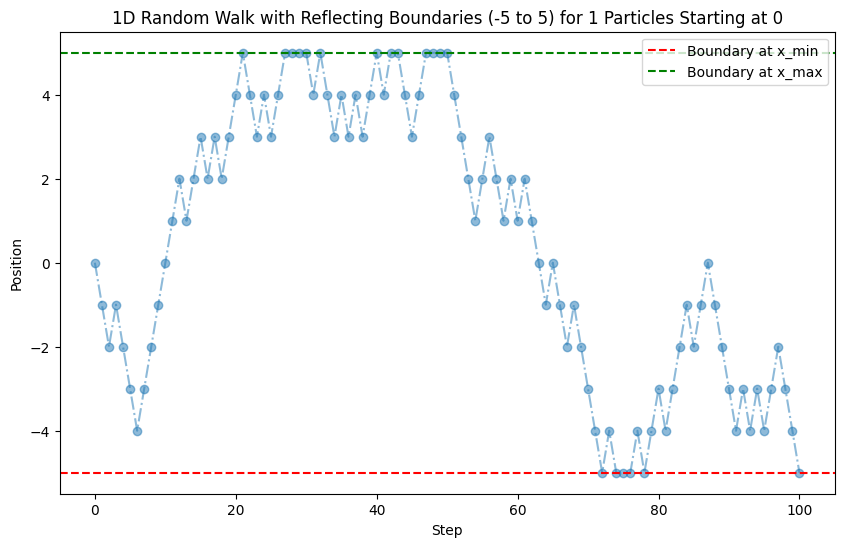

In [ ]:
# Example usage:
walk = random_walk_reflecting(num_particles=1, num_steps=100, x_min=-5, x_max=5, sticking_type='stick')
plot_trajectories(walk, x_min=-5, x_max=5, num_particles=1)

Let's observe another particle.

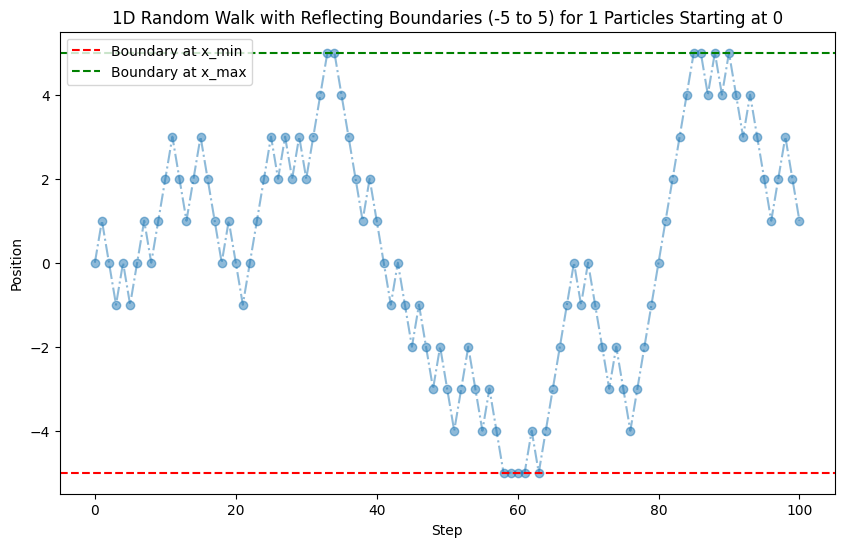

In [ ]:
walk = random_walk_reflecting(num_particles=1, num_steps=100, x_min=-5, x_max=5, sticking_type='stick')
plot_trajectories(walk, x_min=-5, x_max=5, num_particles=1)

Next, 5 particles together

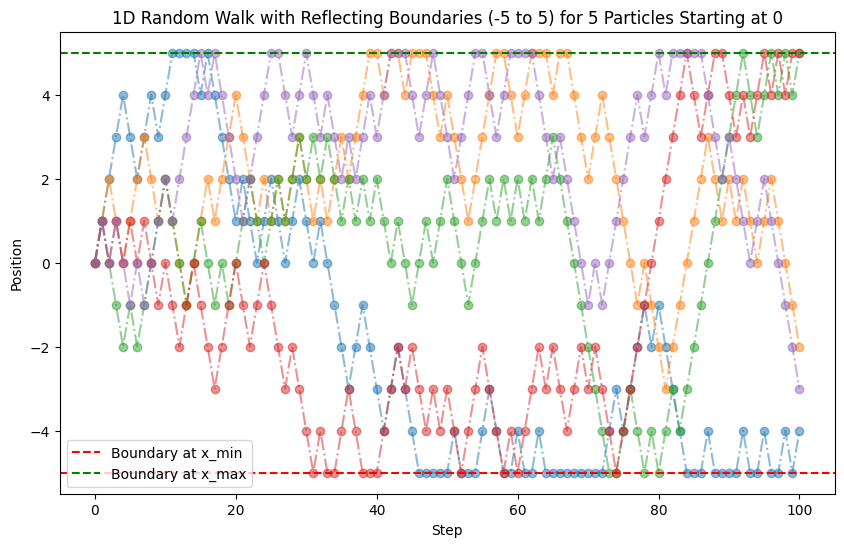

In [ ]:
walk = random_walk_reflecting(num_particles=5, num_steps=100, x_min=-5, x_max=5, sticking_type='stick')
plot_trajectories(walk, x_min=-5, x_max=5, num_particles=5)

Now **10 particles**. We will start observing **more and more reflections/ sticking events at the boundaries**.

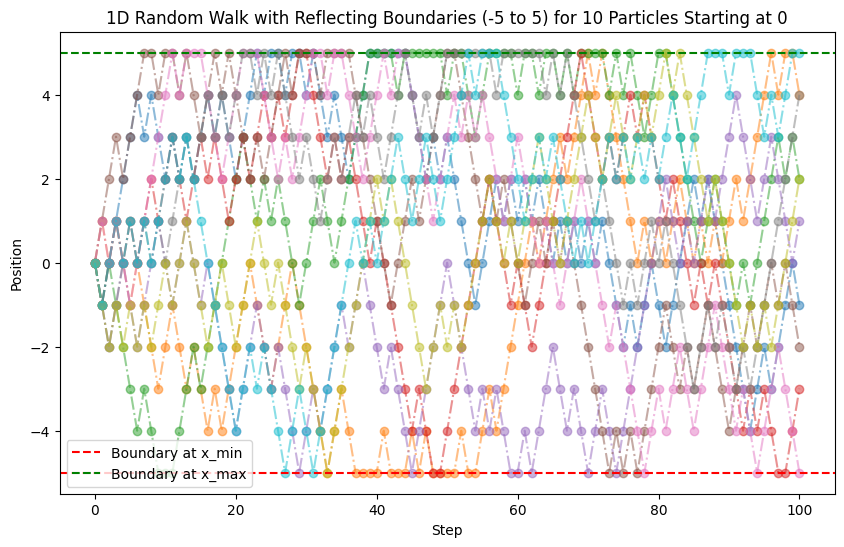

In [ ]:
walk = random_walk_reflecting(num_particles=10, num_steps=100, x_min=-5, x_max=5, sticking_type='stick')
plot_trajectories(walk, x_min=-5, x_max=5, num_particles=10)

Finally **100 particles**!

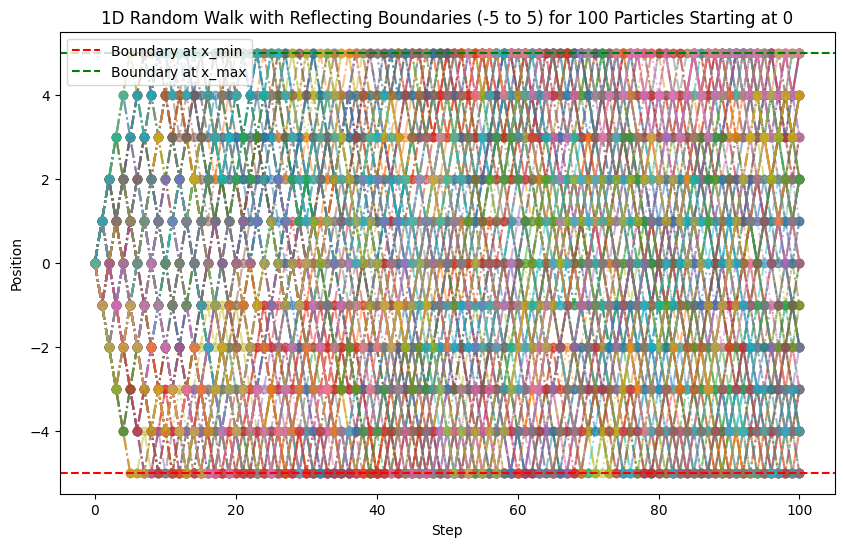

In [ ]:
walk = random_walk_reflecting(num_particles=100, num_steps=100, x_min=-5, x_max=5, sticking_type='stick')
plot_trajectories(walk, x_min=-5, x_max=5, num_particles=100)

We will also plot **the probability distribution of the particle ending up** at a certain location after 100 steps.

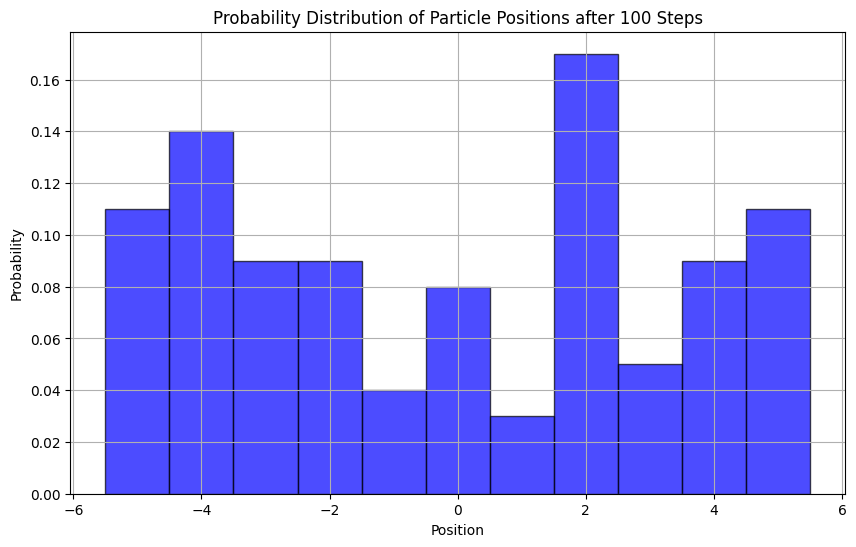

In [ ]:
final_positions = walk[:,-1]   # extract the final position of the particles at the end of the random walk
plot_probability_distribution(final_positions, num_steps=100)

We notice, it's not *uniform*. Let's increase the number of particles even more.

N = 500

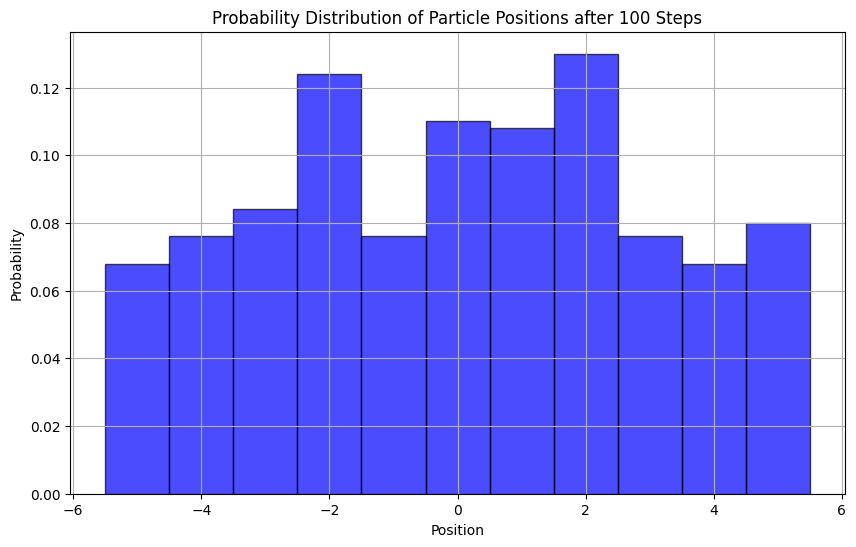

In [ ]:
walk = random_walk_reflecting(num_particles=500, num_steps=100, x_min=-5, x_max=5, sticking_type='stick')
final_positions = walk[:,-1]
plot_probability_distribution(final_positions, num_steps=100)

We introduce even more particles!

N = 100000

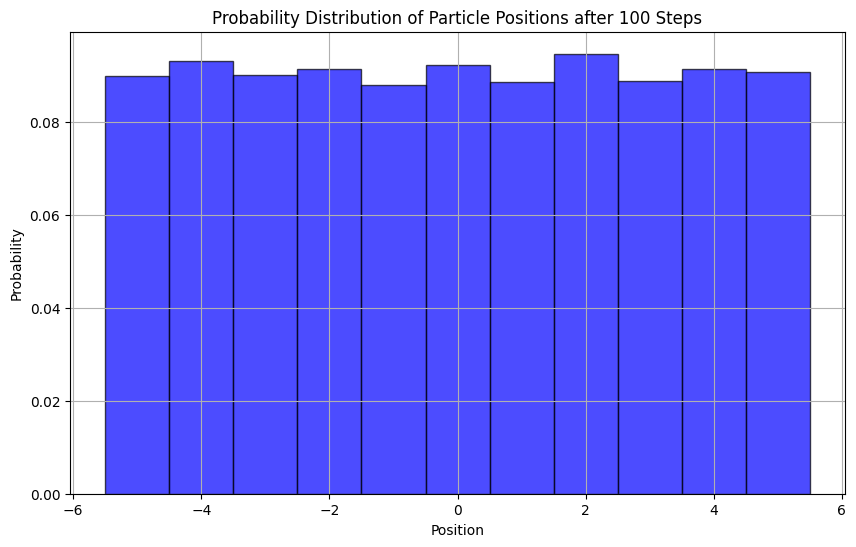

In [ ]:
walk = random_walk_reflecting(num_particles=100000, num_steps=100, x_min=-5, x_max=5, sticking_type='stick')
final_positions = walk[:,-1]
plot_probability_distribution(final_positions, num_steps=100)

We notice, the **probability distribution becomes more and more uniform as the number of particle increases** i.e. there is equal likelihood for us to find the particle at any point within the bounds.

## Take-home message:

*   In the bounded random walk, particles are confined within the range (e.g., -5 to 5 in this case). When a particle reaches the boundary, it "bounces" back or "sticks" to it (depending on which condition we are simulating), and this repeated bouncing causes the **particles to spread out within the confined space more quickly**.
*   
Since the particles cannot drift indefinitely in one direction (like in an unbounded random walk), the **system tends to reach a more uniform or steady distribution earlier**. Over time, the distribution will likely flatten out across the bounded region.

